# 胜率和加数

## 胜率
胜率(odds)是一个事件可能发生的概率与不发生的概率的比值。

## 贝叶斯定理的胜率形式
贝叶斯定理的概率形式：
$$ P(H|D) = \frac{P(H)P(D|H)}{P(D)} $$
如果有A和B两个假设，
$$ \frac{P(A|D)}{P(B|D)} = \frac{P(A)P(D|A)}{P(B)P(D|B)} $$
如果A和B是互斥且穷尽的，即 $ P(B) = 1 - P(A) $，则：
$$ o(A|D) = o(A)\frac{P(D|A)}{P(D|B)} $$

### 曲奇饼问题
假设有两碗曲奇饼，碗1包含30个香草曲奇饼和10个巧克力曲奇饼，碗2包含两种曲奇饼各20个。  
现在假设你随意选择了一个碗，然后随意选择一个曲奇饼。如果是香草曲奇饼，它来自碗1的概率是多少？ (3/5)
$$ \frac{1}{1}\frac{3/4}{1/2} = 3/2 $$

### 奥利弗的血迹
在一个犯罪现场，有两人遗留了血迹。一名疑犯奥利弗经过测试发现是“O”型血。而发现的痕迹中血型分别是“O”型（一种本地人的常见血型，有60%的概率）和“AB”型（一种罕见的血型，概率1%）。  
那么这些数据[现场发现的痕迹]是否支持奥利弗是疑犯之一[在现场遗留下血液证据的人]？ （没有）

## 加数
### 龙与地下城
通过转动3个6面骰子并把结果相加得到一个总和  
模拟：给定一个表示骰子面分布的Pmf，可以绘制随机样品，把它们加起来，累加每次模拟求和的分布。  
枚举：给定三个Pmfs，可以枚举所有可能的数值对，并计算和的分布。

### 模拟

In [1]:
from thinkbayes import Pmf, SampleSum
class Die(Pmf):
    def __init__(self, sides):
        Pmf.__init__(self)
        for x in xrange(1, sides+1):
            self.Set(x, 1)
        self.Normalize()

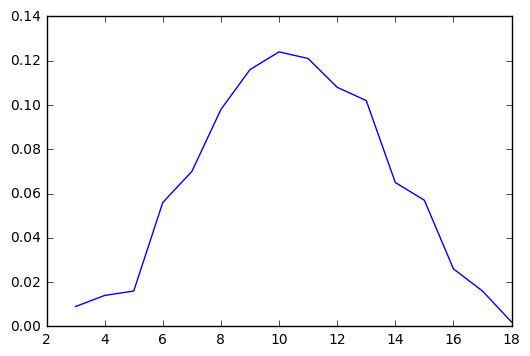

In [9]:
d6 = Die(6)
dice = [d6]*3
three = SampleSum(dice, 1000)
'''
def SampleSum(dists, n):
    pmf = MakePmfFromList(RandomSum(dists) for i in xrange(n))
    return pmf

def RandomSum(dists):
    total = sum(dist.Random() for dist in dists)
    return total
'''
#print(three.Items())
x = [item[0] for item in three.Items()]
prob = [item[1] for item in three.Items()]
import matplotlib.pyplot as plt
plt.plot(x, prob)
plt.legend()
plt.show();

### 枚举

In [10]:
''' class Pmf
def __add__(self, other):
    pmf = Pmf()
    for v1, p1 in self.Items():
        for v2, p2 in other.Items():
            pmf.Incr(v1+v2, p1*p2)
    return pmf
'''
three_exact = d6 + d6 + d6
three_exact.Random()

7

### 最大化
如果我从 $CDF_1$ 中取出 $X$，从 $CDF_2$中取出 $Y$，计算最大 $Z = max(X,Y)$？  
如果选择 $X$ 和 $Y$ 是独立行为，  
$ CDF_3 (X) = CDF_1 (X) CDF_2 (Y) $

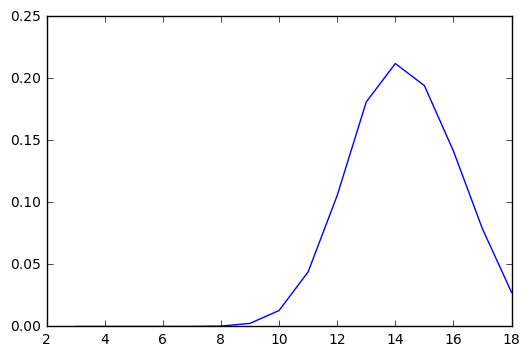

In [13]:
''' class Cdf
def Max(self, k):
    cdf = self.Copy()
    cdf.ps = [p**k for p in cdf.ps]
    return cdf
'''
# Max方法接受选取的次数k，然后返回一个新的表示进行k次选择最大值的Cdf
best_attr_cdf = three_exact.Max(6)
best_attr_pmf = best_attr_cdf.MakePmf()
#best_attr_pmf.Items()
x = [item[0] for item in best_attr_pmf.Items()]
prob = [item[1] for item in best_attr_pmf.Items()]
import matplotlib.pyplot as plt
plt.plot(x, prob)
plt.legend()
plt.show();

## 混合分布
假设我有一盒骰子，清单如下：
- 5个  4面骰子
- 4个  6面骰子
- 3个  8面骰子
- 2个  12面骰子
- 1个  20面骰子

从盒子中选择一个骰子转动，结果会呈现什么分布？

In [17]:
# 简单版本，一个6面骰和一个8面骰
d6 = Die(6)
d8 = Die(8)
mix = Pmf()
for die in [d6, d8]:
    for outcome, prob in die.Items():
        mix.Incr(outcome, prob)
mix.Normalize();
#mix.Print()

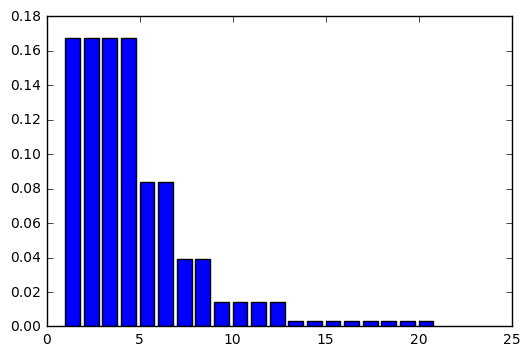

In [21]:
# 创建一个映射了骰子和骰子被选中概率的Pmf对象
pmf_dice = Pmf()
# 只是给每个骰子分配一个先验概率
pmf_dice.Set(Die(4), 5)
pmf_dice.Set(Die(6), 4)
pmf_dice.Set(Die(8), 3)
pmf_dice.Set(Die(12), 2)
pmf_dice.Set(Die(20), 1)
pmf_dice.Normalize()
#pmf_dice.Print()
# 具体的每个点数
'''
mix = Pmf()
for die, weight in pmf_dice.Items():
    for outcome, prob in die.Items():
        mix.Incr(outcome, weight*prob)
'''
from thinkbayes import MakeMixture
mix = MakeMixture(pmf_dice)
#print(mix.Items())
x = [item[0] for item in mix.Items()]
prob = [item[1] for item in mix.Items()]
import matplotlib.pyplot as plt
plt.bar(x, prob)
plt.legend()
plt.show();